<a href="https://colab.research.google.com/github/Alchemist98/Kaggle_Projects/blob/master/detect_linguistic_cues_in_Alzheimer's_disease_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
dataframe = pd.read_csv('/content/final_data.csv')
dataframe

,Comments,AD
0,i feel like you re always out and about laughs,0
1,when you were working,1
2,said you re here to take care of this resident...,0
3,oh yeah,1
4,yeah,0
...,...,...
3996,do you remember,0
3997,xxx got uh everything in there,1
3998,mhm,1
3999,oh really,0


In [124]:
dataframe['Comments']=dataframe['Comments'].apply(str)

In [125]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

corpus = []

for i in range(len(dataframe)):
    # remove all symbols, keep only alphabets
    utt = re.sub('[^a-zA-Z]',' ',dataframe['Comments'][i])
    # convert to lowercase
    utt = utt.lower()
    # split into words
    utt = utt.split()
    # performing lemmatization
    lem = WordNetLemmatizer()
    utt = [lem.lemmatize(word) for word in utt]
    # join back to form sentences
    utt = ' '.join(utt)
    # append to variable corpus
    corpus.append(utt)

corpus[:21]

['i feel like you re always out and about laugh',
 'when you were working',
 'said you re here to take care of this resident you re not here',
 'oh yeah',
 'yeah',
 'um what are they called',
 'you are',
 'and i hafta be some place in in fifteen minute',
 'i agree',
 'first place i i m not sposta fly',
 'and uh it wasn t long he took u down to uh ohio there in ohio',
 'but it made you more aware of what you were doing',
 'i went back and i communicated with th em',
 'i wa the only one that wa born here',
 'and i wanna walk',
 'took up so much room',
 'mm yes',
 'that s awesome',
 'where do you keep your calendar',
 'so that s what we do um it s our big treatment',
 'that s good']

In [126]:
corpus = pd.DataFrame(data = corpus, columns = ['Comments'])
corpus

,Comments
0,i feel like you re always out and about laugh
1,when you were working
2,said you re here to take care of this resident...
3,oh yeah
4,yeah
...,...
3996,do you remember
3997,xxx got uh everything in there
3998,mhm
3999,oh really


In [127]:
corpus['AD'] = dataframe['AD'].values
corpus

,Comments,AD
0,i feel like you re always out and about laugh,0
1,when you were working,1
2,said you re here to take care of this resident...,0
3,oh yeah,1
4,yeah,0
...,...,...
3996,do you remember,0
3997,xxx got uh everything in there,1
3998,mhm,1
3999,oh really,0


In [128]:
print(corpus.isna().sum().sum())

0


In [129]:
y = corpus.iloc[:,1].values
y

array([0, 1, 0, ..., 1, 0, 1])

In [130]:
corpus = corpus['Comments'].tolist()
corpus

['i feel like you re always out and about laugh',
 'when you were working',
 'said you re here to take care of this resident you re not here',
 'oh yeah',
 'yeah',
 'um what are they called',
 'you are',
 'and i hafta be some place in in fifteen minute',
 'i agree',
 'first place i i m not sposta fly',
 'and uh it wasn t long he took u down to uh ohio there in ohio',
 'but it made you more aware of what you were doing',
 'i went back and i communicated with th em',
 'i wa the only one that wa born here',
 'and i wanna walk',
 'took up so much room',
 'mm yes',
 'that s awesome',
 'where do you keep your calendar',
 'so that s what we do um it s our big treatment',
 'that s good',
 'no i wa the second oldest',
 'and i sat down in the recliner clear throat to watch the news',
 'did you talk to her about the group after or',
 'i guess he more or le went through the door',
 'hm',
 'uhhuh',
 'oh well i wa born in fort wayne indiana',
 'in fact tha there were two that i set off today',
 'and

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [132]:

X = cv.fit_transform(corpus).toarray()
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [133]:
print(X.shape)
print(y.shape)

(4001, 1665)
(4001,)


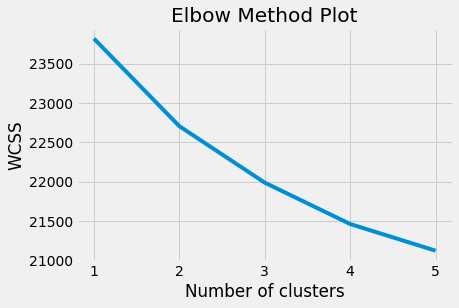

In [134]:

# K-means clustering 
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
wcss = []
for i in range (1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, ..., 1, 1, 0], dtype=int32)

In [136]:
print("Top terms per cluster:")
print()

#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

terms = cv.get_feature_names()
for i in range(3):
    print('Cluster %d:' % i)
    for index in order_centroids[i, :6]:
        print(' %s' % terms[index])
    print()
print()

Top terms per cluster:

Cluster 0:
 and
 the
 it
 that
 uh
 in

Cluster 1:
 that
 yeah
 mhm
 it
 the
 to

Cluster 2:
 you
 know
 do
 that
 the
 and




In [137]:
# import keras modules
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [138]:
from sklearn.model_selection import train_test_split

Xwords_train, Xwords_test, ywords_train, ywords_test = train_test_split(corpus, y, test_size = 0.2, random_state = 0)

In [139]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(Xwords_train)

Xwords_train = tokenizer.texts_to_sequences(Xwords_train)
Xwords_test = tokenizer.texts_to_sequences(Xwords_test)

In [140]:

vocab = len(tokenizer.word_index) + 1   # Add one for the zero indexing
vocab

1536

In [141]:

# introducing padding for even length sequences

from keras.preprocessing.sequence import pad_sequences

Xwords_train = pad_sequences(Xwords_train, padding = 'post', maxlen = 100)
Xwords_test = pad_sequences(Xwords_test, padding = 'post', maxlen = 100)

In [142]:

print(Xwords_train.shape)
print(Xwords_test.shape)
print(ywords_train.shape)
print(ywords_test.shape)

(3200, 100)
(801, 100)
(3200,)
(801,)


In [143]:

# Importing Keras dependencies

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [144]:

# Initialize CNN
cnn = Sequential()

# Common lengths for embeddings (output_dim) are between 100 and 300. 
# Anything less than 100 isn't enough to represent the vocabulary properly
# Input length is maxlen of the padded sequence

cnn.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn.add(Conv1D(128, 5, activation='relu'))   # filters = 128, kernel size = 5 
cnn.add(MaxPooling1D(pool_size = 2))
cnn.add(Flatten())
cnn.add(Dense(units = 256, activation = 'relu'))    # Fully Connected Layer
cnn.add(Dense(units = 1, activation = 'sigmoid'))   # Output layer

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [145]:
cnn.fit(Xwords_train, ywords_train, 
          epochs=10, batch_size=128, verbose=1, 
          validation_data=(Xwords_test, ywords_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3200 samples, validate on 801 samples
Epoch 1/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.6516 - accuracy: 0.6381 - val_loss: 0.6311 - val_accuracy: 0.6305
Epoch 2/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5706 - accuracy: 0.6753 - val_loss: 0.5519 - val_accuracy: 0.6879
Epoch 3/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4357 - accuracy: 0.7875 - val_loss: 0.4955 - val_accuracy: 0.7678
Epoch 4/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3390 - accuracy: 0.8400 - val_loss: 0.5236 - val_accuracy: 0.7516
Epoch 5/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.2692 - accuracy: 0.8753 - val_loss: 0.5475 - val_accuracy: 0.7678
Epoch 6/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.2394 - accuracy: 0.8881 - val_loss: 0.5939 - val_accuracy: 0.7578
Epoch 7/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.2071 - accu

In [146]:
scores = cnn.evaluate(Xwords_test, ywords_test, verbose=1)
print("Accuracy:", scores[1])

801/801 [==============================] - 0s 341us/step
Accuracy: 0.7627965211868286


In [147]:

# Defining function to create model
# After all steps of grid search are completed, the best parameters are fitted into this function

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

def model_cnn_create(neurons = 256, optimizer = 'RMSprop', activation = 'softmax', kernel_init = 'uniform',
                 dropout_rate = 0.1, weight_constraint = 3, nb_filters = 128, kernel_size = 3):
    
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
    model.add(Conv1D(nb_filters, kernel_size, activation = 'relu'))   
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Flatten())
    model.add(Dense(units = neurons, activation = activation, kernel_init = kernel_init, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(units = 1, activation = 'sigmoid', kernel_init = kernel_init))   
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    

In [148]:

# Initialize base model

cnn_lstm = Sequential()

cnn_lstm.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn_lstm.add(Conv1D(64, 5, activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = 4))
cnn_lstm.add(LSTM(10))
cnn_lstm.add(Dense(units = 1, activation = 'sigmoid'))
cnn_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [149]:

cnn_lstm.fit(Xwords_train, ywords_train, 
          epochs=10, batch_size=64, verbose=1, 
          validation_data=(Xwords_test, ywords_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3200 samples, validate on 801 samples
Epoch 1/10
3200/3200 [==============================] - 3s 911us/step - loss: 0.6591 - accuracy: 0.6325 - val_loss: 0.6587 - val_accuracy: 0.6305
Epoch 2/10
3200/3200 [==============================] - 3s 794us/step - loss: 0.6548 - accuracy: 0.6388 - val_loss: 0.6587 - val_accuracy: 0.6305
Epoch 3/10
3200/3200 [==============================] - 2s 780us/step - loss: 0.6546 - accuracy: 0.6388 - val_loss: 0.6587 - val_accuracy: 0.6305
Epoch 4/10
3200/3200 [==============================] - 3s 782us/step - loss: 0.6547 - accuracy: 0.6388 - val_loss: 0.6590 - val_accuracy: 0.6305
Epoch 5/10
3200/3200 [==============================] - 3s 795us/step - loss: 0.6465 - accuracy: 0.6388 - val_loss: 0.6007 - val_accuracy: 0.6305
Epoch 6/10
3200/3200 [==============================] - 3s 814us/step - loss: 0.5657 - accuracy: 0.7287 - val_loss: 0.5831 - val_accuracy: 0.7303
Epoch 7/10
3200/3200 [==============================] - 3s 795us/step - loss:

In [150]:

scores = cnn_lstm.evaluate(Xwords_test, ywords_test, verbose=1)
print("Accuracy:", scores[1])

801/801 [==============================] - 0s 208us/step
Accuracy: 0.7640449404716492


In [151]:
cnn = Sequential()
cnn.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn.add(Dropout(0.1))
cnn.add(Conv1D(128, 3, activation = 'relu'))   
cnn.add(MaxPooling1D(pool_size = 2))
cnn.add(Flatten())
cnn.add(Dense(units = 256, activation = 'softmax', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))
cnn.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))   
cnn.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [152]:

history = cnn.fit(Xwords_train, ywords_train, 
          epochs = 10, batch_size = 40, verbose = 1, 
          validation_data = (Xwords_test, ywords_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3200 samples, validate on 801 samples
Epoch 1/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6767 - accuracy: 0.6344 - val_loss: 0.6718 - val_accuracy: 0.6305
Epoch 2/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6661 - accuracy: 0.6388 - val_loss: 0.6649 - val_accuracy: 0.6305
Epoch 3/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6599 - accuracy: 0.6388 - val_loss: 0.6611 - val_accuracy: 0.6305
Epoch 4/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6566 - accuracy: 0.6388 - val_loss: 0.6595 - val_accuracy: 0.6305
Epoch 5/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6553 - accuracy: 0.6388 - val_loss: 0.6589 - val_accuracy: 0.6305
Epoch 6/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6546 - accuracy: 0.6388 - val_loss: 0.6587 - val_accuracy: 0.6305
Epoch 7/10
3200/3200 [==============================] - 5s 1ms/step - loss: 0.6544 - accu

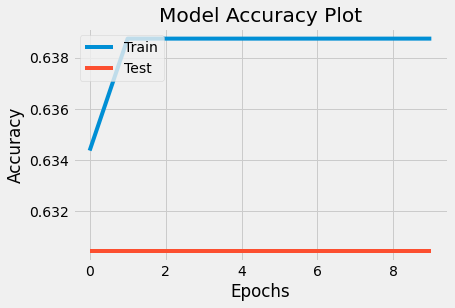

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc = 'upper left')
plt.show()

In [154]:

cnn_lstm = Sequential()
cnn_lstm.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Conv1D(128, 3, activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = 4))
cnn_lstm.add(LSTM(10))
cnn_lstm.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid')) 
cnn_lstm.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [155]:
lstm_history = cnn_lstm.fit(Xwords_train, ywords_train, 
          epochs = 10, batch_size = 64, verbose = 1, 
          validation_data = (Xwords_test, ywords_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3200 samples, validate on 801 samples
Epoch 1/10
3200/3200 [==============================] - 3s 1ms/step - loss: 0.6572 - accuracy: 0.6388 - val_loss: 0.6587 - val_accuracy: 0.6305
Epoch 2/10
3200/3200 [==============================] - 3s 975us/step - loss: 0.6554 - accuracy: 0.6388 - val_loss: 0.6592 - val_accuracy: 0.6305
Epoch 3/10
3200/3200 [==============================] - 3s 961us/step - loss: 0.6548 - accuracy: 0.6388 - val_loss: 0.6589 - val_accuracy: 0.6305
Epoch 4/10
3200/3200 [==============================] - 3s 959us/step - loss: 0.6215 - accuracy: 0.6591 - val_loss: 0.5515 - val_accuracy: 0.7516
Epoch 5/10
3200/3200 [==============================] - 3s 959us/step - loss: 0.5115 - accuracy: 0.7738 - val_loss: 0.5379 - val_accuracy: 0.7740
Epoch 6/10
3200/3200 [==============================] - 3s 970us/step - loss: 0.4615 - accuracy: 0.7987 - val_loss: 0.4810 - val_accuracy: 0.7778
Epoch 7/10
3200/3200 [==============================] - 3s 956us/step - loss: 0

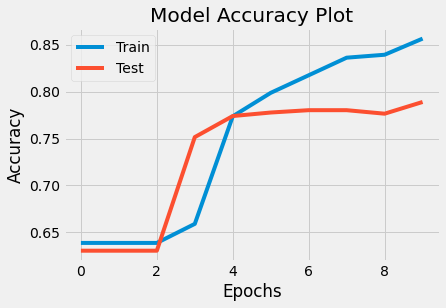

In [156]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc = 'upper left')
plt.show()